## Text Preprocessing using NLP
- Lower casing
- Tokenization
- Punctuation removal
- Stopwords removal
- Stemming
- Lemmatization

In [112]:
import pandas as pd
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /Users/devarajag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
import re

In [115]:
crime_data = pd.read_csv('./data/crime_data.csv')

In [116]:
crime_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [117]:
crime_data.drop(columns=['Unnamed: 0'], inplace=True)

In [118]:
# create new coloumn preprocessed
crime_data['Preprocessed'] = None

In [119]:
crime_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,Preprocessed
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,None
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,None
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,None
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,None
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,None


In [120]:
def preprocess(text):

    #remove non alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text)

    #lowercase
    text = text.lower()

    #tokenization
    words = nltk.word_tokenize(text)

    #punctuation mark removal
    words = [word for word in words if word.isalnum()]

    #stopwords removal
    words_stop = []
    for word in words:
        if word not in stopwords.words('english'):
            words_stop.append(word)

    #stemming
    words_stem = []
    for word in words_stop:
        words_stem.append(ps.stem(word))

    #lemmatization
    words_lemmatized = []
    for word in words_stem:
        words_lemmatized.append(lm.lemmatize(word))

    #join words
    text = ' '.join(words_lemmatized)

    return text



In [121]:
#loop through tweet coloumn
for i in range(len(crime_data['tweet'])):
    crime_data['Preprocessed'][i] = preprocess(crime_data['tweet'][i])
    

/var/folders/rm/39k96t3x6cx1bbvwk49bs48c0000gn/T/ipykernel_22563/2672626865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Preprocessed'][i] = preprocess(crime_data['tweet'][i])


In [122]:
crime_data

,count,hate_speech,offensive_language,neither,class,tweet,Preprocessed
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva base look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeask pearl corey emanuel right t...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart babi drove redneck crazi
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [123]:
crime_data.to_csv('./data/crime_data_preprocessed.csv', index=False)

In [124]:
main_data = pd.read_csv('./data/crime_data_preprocessed.csv')
main_data = main_data.drop(columns=['count','hate_speech','offensive_language','neither','tweet'])
main_data

,class,Preprocessed
0,2,rt mayasolov woman complain clean hous amp man...
1,1,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,1,rt urkindofbrand dawg rt sbabi life ever fuck ...
3,1,rt c g anderson viva base look like tranni
4,1,rt shenikarobert shit hear might true might fa...
...,...,...
24778,1,muthaf lie lifeask pearl corey emanuel right t...
24779,2,gone broke wrong heart babi drove redneck crazi
24780,1,young buck wan na eat dat nigguh like aint fuc...
24781,1,youu got wild bitch tellin lie


In [125]:
main_data.to_csv('./data/crime_data_main.csv', index=False)

In [126]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

#### Hate speech word cloud

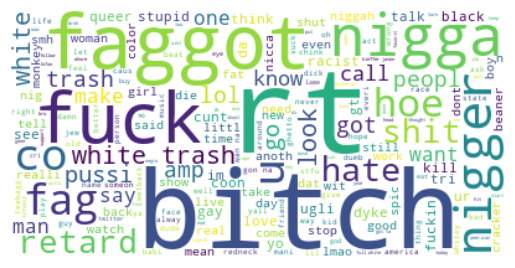

In [127]:
text = ' '.join(x for x in crime_data[crime_data['class'] == 0]['Preprocessed'])
wordcloud = WordCloud(background_color="white").generate(text)
# plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Offensive Language Word cloud

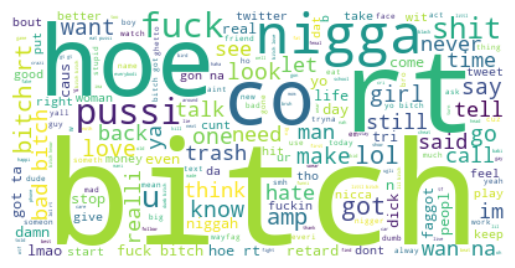

In [128]:
text = ' '.join(x for x in crime_data[crime_data['class'] == 1]['Preprocessed'])
wordcloud = WordCloud(background_color="white").generate(text)
# plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Neither word cloud

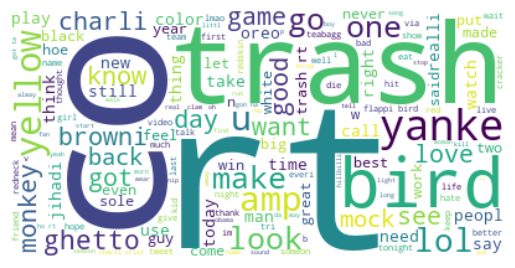

In [129]:
text = ' '.join(x for x in crime_data[crime_data['class'] == 2]['Preprocessed'])
wordcloud = WordCloud(background_color="white").generate(text)
# plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()